In [1]:
import seaborn as sns
import  pandas as pd
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [2]:
signTypes = pd.read_csv("signTypes.csv", encoding='latin-1')

In [4]:
signTypes

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,TOTAL ESPERADOS,precision,Tipo
0,A,5,5.061517e+05,50,5,4.430950e+05,46,5,4.786245e+05,46,15,100.00,0
1,B,5,3.183026e+05,48,3,3.560399e+05,46,5,3.665895e+05,42,15,86.67,0
2,BN,5,5.801136e+05,45,5,4.302006e+05,37,4,4.947558e+05,43,15,93.33,1
3,C,2,3.797425e+05,43,5,3.537585e+05,48,5,4.671643e+05,50,15,80.00,0
4,CME,5,1.915784e+06,62,5,1.284350e+06,61,5,1.922486e+06,62,15,100.00,1
5,D,5,7.870783e+05,64,5,6.116143e+05,63,5,7.150149e+05,62,15,100.00,0
6,E,5,5.838656e+05,45,5,6.219022e+05,54,4,3.268881e+05,58,15,93.33,0
7,F,5,4.060792e+05,57,5,4.736113e+05,65,5,6.786768e+05,65,15,100.00,0
8,G,5,5.325505e+05,56,5,4.629168e+05,55,5,5.775098e+05,60,15,100.00,0
9,GRA,4,1.297981e+06,65,5,1.025425e+06,65,5,1.534943e+06,65,15,93.33,1


In [110]:
X = signTypes.drop('Tipo', axis=1)

In [111]:
y =signTypes['Tipo']

In [112]:
from sklearn.preprocessing import OneHotEncoder

# Crear instancia del codificador one-hot
encoder = OneHotEncoder()

# Realizar la codificación one-hot de las variables categóricas
X_encoded = encoder.fit_transform(X)

# Continuar con el proceso de división de datos y entrenamiento del modelo


In [113]:

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, stratify=y, test_size=.28, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    stratify=y_trainval, test_size=.28, random_state=1)

In [114]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (18, 12)
y_train shape (18,)
X_val shape (8, 12)
y_val shape (8,)
X_test shape (11, 12)
y_test shape (11,)


In [115]:

majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.625

In [116]:

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

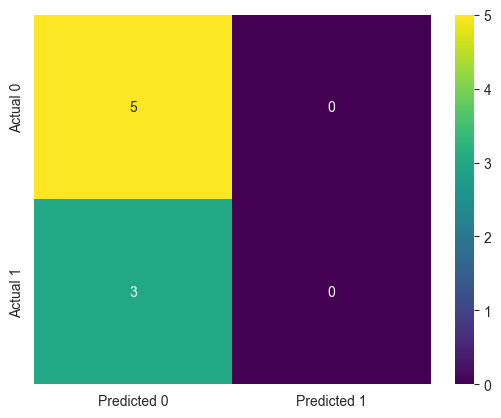

In [117]:
plot_confusion_matrix(y_val, y_pred)

In [121]:

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



In [119]:

roc_auc_score(y_val,y_pred)

0.5

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Cargar los datos desde el archivo CSV
signTypes = pd.read_csv('https://raw.githubusercontent.com/joshtorres07/Big-Data-Project/main/signTypes.csv', encoding='latin-1')

# Separar las características (X) y la variable objetivo (y)
X = signTypes.drop('Tipo', axis=1)
y = signTypes['Tipo']

# Convertir las variables categóricas en variables numéricas
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y validación
X_trainval, X_test, y_trainval, y_test = train_test_split(X_encoded, y, stratify=y, test_size=.28, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify=y_trainval, test_size=.28, random_state=1)

# Crear una instancia del clasificador de Bosques Aleatorios
rf_classifier = RandomForestClassifier()

# Entrenar el modelo utilizando el conjunto de entrenamiento
rf_classifier.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de validación
y_pred = rf_classifier.predict(X_val)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_val, y_pred)
print("Precisión del modelo de Bosques Aleatorios:", accuracy)

# Calcular el ROC AUC
y_prob = rf_classifier.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC del modelo de Bosques Aleatorios:", roc_auc)

Precisión del modelo de Bosques Aleatorios: 0.75
ROC AUC del modelo de Bosques Aleatorios: 0.7666666666666666


In [123]:
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



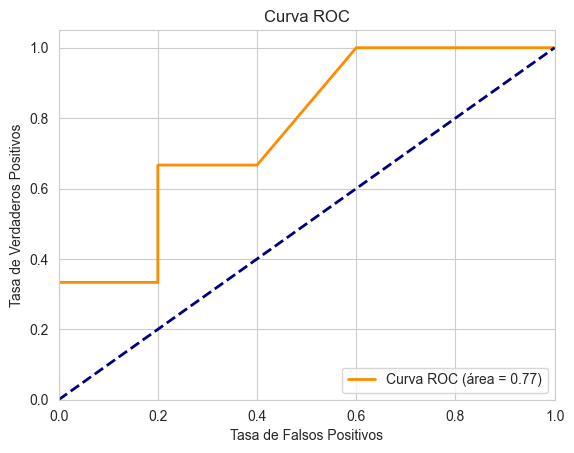

In [124]:
import matplotlib.pyplot as plt
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()